This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Clutter detection using the Gabella approach

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wradlib as wrl
import warnings

warnings.filterwarnings("ignore")
try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()
import numpy as np

### Read the data

In [2]:
filename = wrl.util.get_wradlib_data_file("misc/polar_dBZ_fbg.gz")
data = np.loadtxt(filename)
data = wrl.georef.create_xarray_dataarray(data, rf=0.001).wrl.georef.georeference()
data

<xarray.DataArray (azimuth: 360, range: 128)>
array([[  7.01,   8.28,   5.46, ..., -10.  , -10.  , -10.  ],
       [  7.01,   7.01,   7.01, ..., -10.  , -10.  , -10.  ],
       [  7.01,   7.67,   5.46, ..., -10.  , -10.  , -10.  ],
       ...,
       [  7.01,   8.28,   5.46, ...,  14.87,  17.76,  15.51],
       [  7.67,   7.67,   5.46, ...,   0.64,   8.83,   4.53],
       [  8.83,   7.67,   4.53, ...,  -8.99,  -4.17,  -8.99]])
Coordinates: (12/14)
  * range       (range) float64 500.0 1.5e+03 2.5e+03 ... 1.265e+05 1.275e+05
  * azimuth     (azimuth) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    elevation   (azimuth) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    longitude   float64 0.0
    latitude    float64 0.0
    altitude    float64 0.0
    ...          ...
    y           (azimuth, range) float64 500.0 1.5e+03 ... 1.265e+05 1.275e+05
    z           (azimuth, range) float64 0.0147 0.1323 0.3675 ... 940.8 955.7
    gr          (azimuth, range) float64 500.0 1.5e+03 ... 1.265e+05 1.275e+05
    rays        (azimuth, range) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5
    bins        (azimuth, range) float64 500.0 1.5e+03 ... 1.265e+05 1.275e+05
    crs_wkt     int64 0

### Apply filter

In [3]:
clmap = data.wrl.classify.filter_gabella(
    wsize=5, thrsnorain=0.0, tr1=6.0, n_p=8, tr2=1.3
)
clmap

<xarray.DataArray 'filter_gabella' (azimuth: 360, range: 128)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]])
Coordinates: (12/14)
  * range       (range) float64 500.0 1.5e+03 2.5e+03 ... 1.265e+05 1.275e+05
  * azimuth     (azimuth) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    elevation   (azimuth) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    longitude   float64 0.0
    latitude    float64 0.0
    altitude    float64 0.0
    ...          ...
    y           (azimuth, range) float64 500.0 1.5e+03 ... 1.265e+05 1.275e+05
    z           (azimuth, range) float64 0.0147 0.1323 0.3675 ... 940.8 955.7
    gr          (azimuth, range) float64 500.0 1.5e+03 ... 1.265e+05 1.275e+05
    rays        (azimuth, range) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5
    bins        (azimuth, range) float64 500.0 1.5e+03 ... 1.265e+05 1.275e+05
    crs_wkt     int64 0

### Plot results

Text(0.5, 1.0, 'Cluttermap')

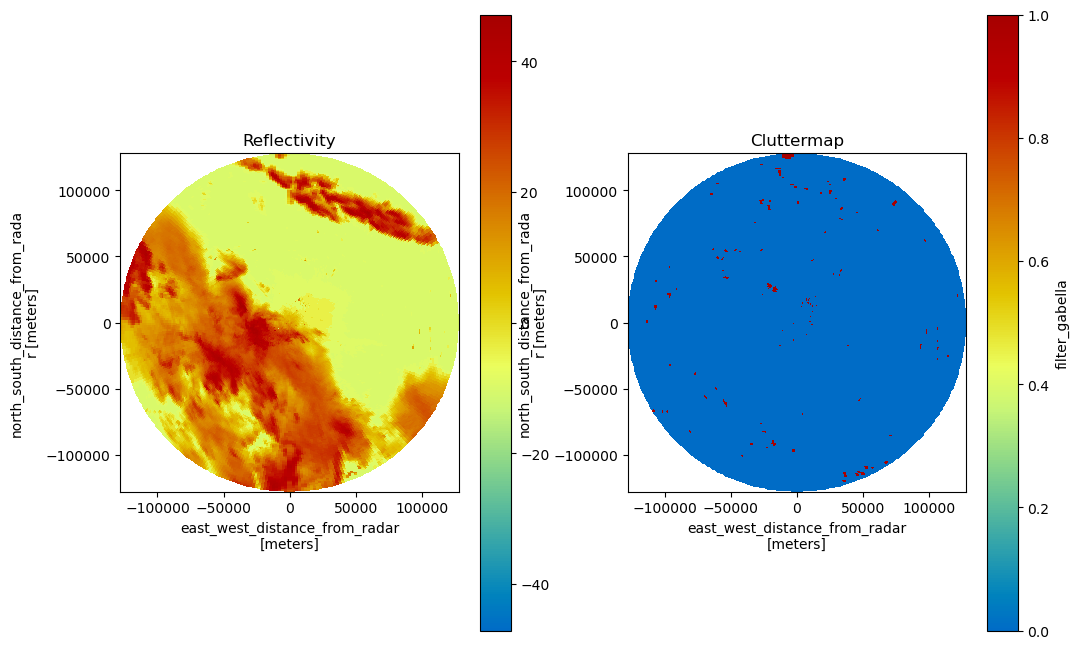

In [4]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(121)
pm = data.wrl.vis.plot(ax=ax1)
ax1.set_title("Reflectivity")
ax2 = fig.add_subplot(122)
pm = clmap.wrl.vis.plot(ax=ax2)
ax2.set_title("Cluttermap")